# Imports

In [41]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import uproot
import pickle
import pandas as pd
import numpy as np
import math
%matplotlib inline

# Load Data:

In [42]:
eventsWithReg_EB = pd.read_pickle("eventsWithReg_pt0to10_EB.pkl")
xtest = pd.read_pickle("xtest_pt0to10.pkl")
ytest = pd.read_pickle("ytest_pt0to10.pkl")

# Definitions:

In [43]:
Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int = [0,1,2,3,4,5,10,50,100,200,1000]
def Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 2
    if n == 2:
        lowPt = 2
        highPt = 3
    if n == 3:
        lowPt = 3
        highPt = 4
    if n == 4:
        lowPt = 4
        highPt = 5
    if n == 5:
        lowPt = 5
        highPt = 10
    if n == 6:
        lowPt = 10
        highPt = 50
    if n == 7:
        lowPt = 50
        highPt = 100
    if n == 8:
        lowPt = 100
        highPt = 1000
    if n == 9:
        lowPt = 1000
        highPt = 10000
    
    return lowPt, highPt    

In [44]:
Ptrange_0_2_4_7_10_int = [0,2,4,7,10]
def Ptrange_0_2_4_7_10(n):
    if n == 0:
        lowPt = 0
        highPt = 2
    if n == 1:
        lowPt = 2
        highPt = 4
    if n == 2:
        lowPt = 4
        highPt = 7
    if n == 3:
        lowPt = 7
        highPt = 10
    
    return lowPt, highPt 


In [45]:
Ptrange_0_1_10_100_1000_int = [0,1,10,100,1000]
def Ptrange_0_1_10_100_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 10
    if n == 2:
        lowPt = 10
        highPt = 100
    if n == 3:
        lowPt = 100
        highPt = 1000
    
    return lowPt, highPt   

In [46]:
Ptrange_0_10_1000_int = [0,10,1000]
def Ptrange_0_10_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 1000
    
    return lowPt, highPt   

In [47]:
Ptrange_0_10_500_1000_1500_int = [0,10,500,1000,1500]
def Ptrange_0_10_500_1000_1500(n):
    if n == 0:
        lowPt = 0
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 500
    if n == 2:
        lowPt = 0
        highPt = 1000
    if n == 3:
        lowPt = 10
        highPt = 1500
    
    return lowPt, highPt   

# Variables:

In [48]:
'''regVarsEB = eventsWithReg_EB[["clusrawE", "clusIetaIx", "clusIphiIy", "ietamod20", "iphimod20", "nhits_mod"]]
tgtvar = eventsWithReg_EB[["genEnergy"]]

regVarsEB = regVarsEB[:10000]
tgtvar = tgtvar[:10000]'''

regVarsEB = xtest
tgtvar = ytest
ytest = np.array(ytest)[:10000]
regVarsEB = regVarsEB[:10000]
tgtvar = tgtvar[:10000]
clusrawE = np.array(eventsWithReg_EB["clusrawE"])[:10000]

tgtvar = []
for i in range(len(ytest)):
    tgtvar.extend(ytest[i])

# Loading models and making predicitons:

In [49]:
XGBR = pickle.load(open('XGBR_model_pt0to10.sav', 'rb'))
ETR = pickle.load(open('ETR_model_pt0to10.sav', 'rb'))
NSVR = pickle.load(open('NSVR_model_pt0to10.sav', 'rb'))
SVR = pickle.load(open('SVR_model_pt0to10.sav', 'rb'))
HGBR = pickle.load(open('HGBR_model_pt0to10.sav', 'rb'))
ADA = pickle.load(open('ADA_model_pt0to10.sav', 'rb'))
KNR = pickle.load(open('KNR_model_pt0to10.sav', 'rb'))
RFR = pickle.load(open('RFR_model_pt0to10.sav', 'rb'))

In [50]:
len(regVarsEB)

10000

In [52]:
ypred_XGBR = np.array(XGBR.predict(regVarsEB, ntree_limit=XGBR.best_ntree_limit))
ypred_ETR = ETR.predict(regVarsEB)
ypred_NSVR = NSVR.predict(regVarsEB)
ypred_SVR = SVR.predict(regVarsEB)
ypred_HGBR = HGBR.predict(regVarsEB)
ypred_ADA = ADA.predict(regVarsEB)
ypred_KNR = KNR.predict(regVarsEB)
ypred_RFR = RFR.predict(regVarsEB)

C:\Users\jonla\anaconda4\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


# Creating Dataframe:

In [53]:
genPt = np.array(eventsWithReg_EB["genPt"])[:10000]
genEta = np.array(eventsWithReg_EB["genEta"])[:10000]
response = np.array(eventsWithReg_EB["response"])[:10000]
tgtvar_og = np.array(eventsWithReg_EB["tgtvar"])[:10000]
clusrawE = np.array(eventsWithReg_EB["clusrawE"])[:10000]
cluscorrE = np.array(eventsWithReg_EB["cluscorrE"])[:10000]
clusPt = np.array(eventsWithReg_EB["clusPt"])[:10000]
genEnergy = np.array(eventsWithReg_EB["genEnergy"])[:10000]
e91X = np.array(eventsWithReg_EB["e91X"])[:10000]
events = np.arange(0,10000,1)


rawDivGen = np.divide(clusrawE, genEnergy)[:10000]
e91XDivGen = np.divide(e91X,  genEnergy)[:10000]
xgbrDivGen = np.divide(ypred_XGBR,  tgtvar)[:10000]
nsvrDivGen = np.divide(ypred_NSVR,  tgtvar)[:10000]
corrDivGen = np.divide(cluscorrE,  genEnergy)[:10000]
svrDivGen = np.divide(ypred_SVR,  tgtvar)[:10000]
hgbrDivGen = np.divide(ypred_HGBR,  tgtvar)[:10000]
adaDivGen = np.divide(ypred_ADA,  tgtvar)[:10000]
knrDivGen = np.divide(ypred_KNR,  tgtvar)[:10000]
rfrDivGen = np.divide(ypred_RFR,  tgtvar)[:10000]
etrDivGen = np.divide(ypred_ETR,  tgtvar)[:10000]



In [54]:
len(clusrawE)
len(ypred_ETR)

10000

In [56]:
df = pd.DataFrame({
    'events':events,
    'genPt':genPt,
    'genEta':genEta,
    'clusPt':clusPt,
    'clusrawE':clusrawE,
    'cluscorrE':cluscorrE,
    'e91X' :e91X,
    'genEnergy':genEnergy,
    'rawDivGen':rawDivGen,
    'e91XDivGen':e91XDivGen,
    'xgbrDivGen':xgbrDivGen,
    'nsvrDivGen':nsvrDivGen,
    'svrDivGen':svrDivGen,
    'hgbrDivGen':hgbrDivGen,
    'adaDivGen':adaDivGen,
    'knrDivGen':knrDivGen,
    'rfrDivGen':rfrDivGen,
    'etrDivGen':etrDivGen,
    'corrDivGen':corrDivGen
})
df[['rawDivGen','e91XDivGen','xgbrDivGen','nsvrDivGen','svrDivGen','hgbrDivGen','adaDivGen','knrDivGen','rfrDivGen','etrDivGen','corrDivGen',]]


,rawDivGen,e91XDivGen,xgbrDivGen,nsvrDivGen,svrDivGen,hgbrDivGen,adaDivGen,knrDivGen,rfrDivGen,etrDivGen,corrDivGen
0,0.917415,1.024236,1.151556,1.108386,1.107646,1.171065,1.159061,1.207201,1.291105,1.169126,1.030715
1,0.895248,0.994109,0.883596,0.845450,0.845057,0.881695,0.669431,1.128256,0.850189,0.860135,1.010543
2,0.807306,0.925469,0.879304,0.858290,0.858394,0.877668,1.831349,1.136668,2.419532,0.878478,0.930989
3,0.711758,0.903803,0.955040,0.947554,0.950243,0.961215,0.725593,0.885608,0.771781,0.948269,0.907763
4,0.791482,0.915542,1.103994,1.093881,1.094078,1.090845,1.049562,1.136703,0.755555,1.083883,0.920634
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.895160,1.027761,0.965832,0.964657,0.966209,0.972791,0.986737,0.906686,0.687480,0.985651,1.031472
9996,0.831304,1.035505,1.040142,1.035902,1.036929,1.035004,0.971946,1.022078,0.699682,1.034283,1.031864
9997,0.851867,1.069992,0.960280,0.963617,0.964429,0.970158,0.749964,0.802890,0.797704,0.952049,1.064210
9998,0.772024,0.898142,0.989095,0.983534,0.985266,0.988160,0.724424,1.065892,0.770539,0.973452,0.897732


# create columns which bins corrE/genE for each regression

In [57]:
df['binned_corrDivGen'] = pd.cut(df['corrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_e91XDivGen'] = pd.cut(df['e91XDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_nsvrDivGen'] = pd.cut(df['nsvrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_xgbrDivGen'] = pd.cut(df['xgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_svrDivGen'] = pd.cut(df['svrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_hgbrDivGen'] = pd.cut(df['hgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_adaDivGen'] = pd.cut(df['adaDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_knrDivGen'] = pd.cut(df['knrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_rfrDivGen'] = pd.cut(df['rfrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_etrDivGen'] = pd.cut(df['etrDivGen'], bins = np.arange(.6,1.8,.01))

# create columns which bin genPt

In [58]:
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = np.array(div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int)
df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int, labels = ['0','1','2','3','4','5','6','7','8','9'])

div_bins_0_1_10_100_1000_int = Ptrange_0_1_10_100_1000_int
div_bins_0_1_10_100_1000_int = np.array(div_bins_0_1_10_100_1000_int)
df['binned_genPt_0_1_10_100_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_10_100_1000_int, labels = ['0','1','2','3'])

div_bins_0_10_1000_int = Ptrange_0_10_1000_int
div_bins_0_10_1000_int = np.array(div_bins_0_10_1000_int)
df['binned_genPt_0_10_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_10_1000_int, labels = ['0','1'])

div_bins_0_10_500_1000_1500_int = Ptrange_0_10_500_1000_1500_int
div_bins_0_10_500_1000_1500_int = np.array(div_bins_0_10_500_1000_1500_int)
df['binned_genPt_0_10_500_1000_1500_int'] = pd.cut(df['genPt'], bins = div_bins_0_10_500_1000_1500_int, labels = ['0','1','2','3'])

div_bins_0_2_4_7_10_int = Ptrange_0_2_4_7_10_int
div_bins_0_2_4_7_10_int = np.array(div_bins_0_2_4_7_10_int)
df['binned_genPt_0_2_4_7_10_int'] = pd.cut(df['genPt'], bins = div_bins_0_2_4_7_10_int, labels = ['0','1','2','3'])

# separate genPt bins into separate lists and concatenate those lists into a dictionary "dict_of_genPt_lists":

In [59]:
dict_of_genPt_lists_1 = []
for i in range(0,10):
    dict_of_genPt_lists_1.append(df[df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] == str(i)])
    
dict_of_genPt_lists_2 = []
for i in range(0,10):
    dict_of_genPt_lists_2.append(df[df['binned_genPt_0_1_10_100_1000_int'] == str(i)])
    
dict_of_genPt_lists_3 = []
for i in range(0,10):
    dict_of_genPt_lists_3.append(df[df['binned_genPt_0_10_1000_int'] == str(i)])
    
dict_of_genPt_lists_4 = []
for i in range(0,10):
    dict_of_genPt_lists_4.append(df[df['binned_genPt_0_10_500_1000_1500_int'] == str(i)])
    
dict_of_genPt_lists_5 = []
for i in range(0,10):
    dict_of_genPt_lists_5.append(df[df['binned_genPt_0_2_4_7_10_int'] == str(i)])

# RMSE comparisons:

In [63]:
e91XDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
corrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,corrDivGen)).mean()),4)
etrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
xgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,xgbrDivGen)).mean()),4)
hgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,hgbrDivGen)).mean()),4)
svrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,svrDivGen)).mean()),4)
nsvrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,nsvrDivGen)).mean()),4)
knrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,knrDivGen)).mean()),4)
adaDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,adaDivGen)).mean()),4)
rfrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,rfrDivGen)).mean()),4)

RMSEs = pd.DataFrame({'name' : ['e91XDivGen_RMSE', 'corrDivGen_RMSE', 'etrDivGen_RMSE', 'xgbrDivGen_RMSE', 'hgbrDivGen_RMSE', 'svrDivGen_RMSE', 'nsvrDivGen_RMSE', 'knrDivGen_RMSE'], 
                     'RMSEs' : [e91XDivGen_RMSE, corrDivGen_RMSE, etrDivGen_RMSE, xgbrDivGen_RMSE, hgbrDivGen_RMSE, svrDivGen_RMSE, nsvrDivGen_RMSE, knrDivGen_RMSE]})

In [64]:
RMSEs = RMSEs.set_index('name')

In [65]:
RMSEs['RMSEs'].iloc[3]

0.074

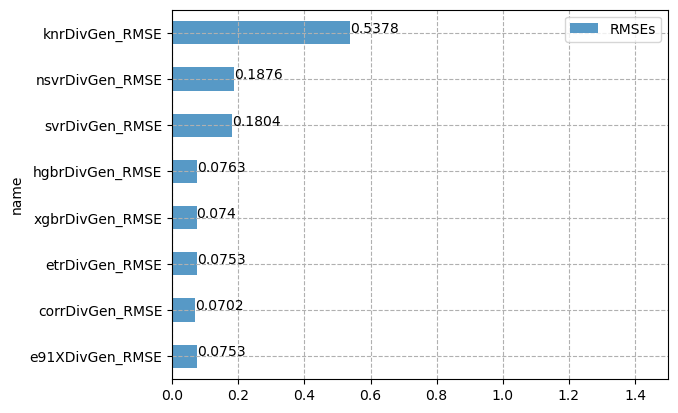

In [66]:

RMSEs.plot( kind='barh',alpha=.75)
plt.xlabel("")
plt.grid('on', ls = '--')
for index, value in enumerate(RMSEs['RMSEs']):
    plt.text(value, index,
             str(RMSEs['RMSEs'][index]))
plt.xlim([0,1.5])
plt.savefig('RMSEs.pdf')
plt.show()



# Histograms:

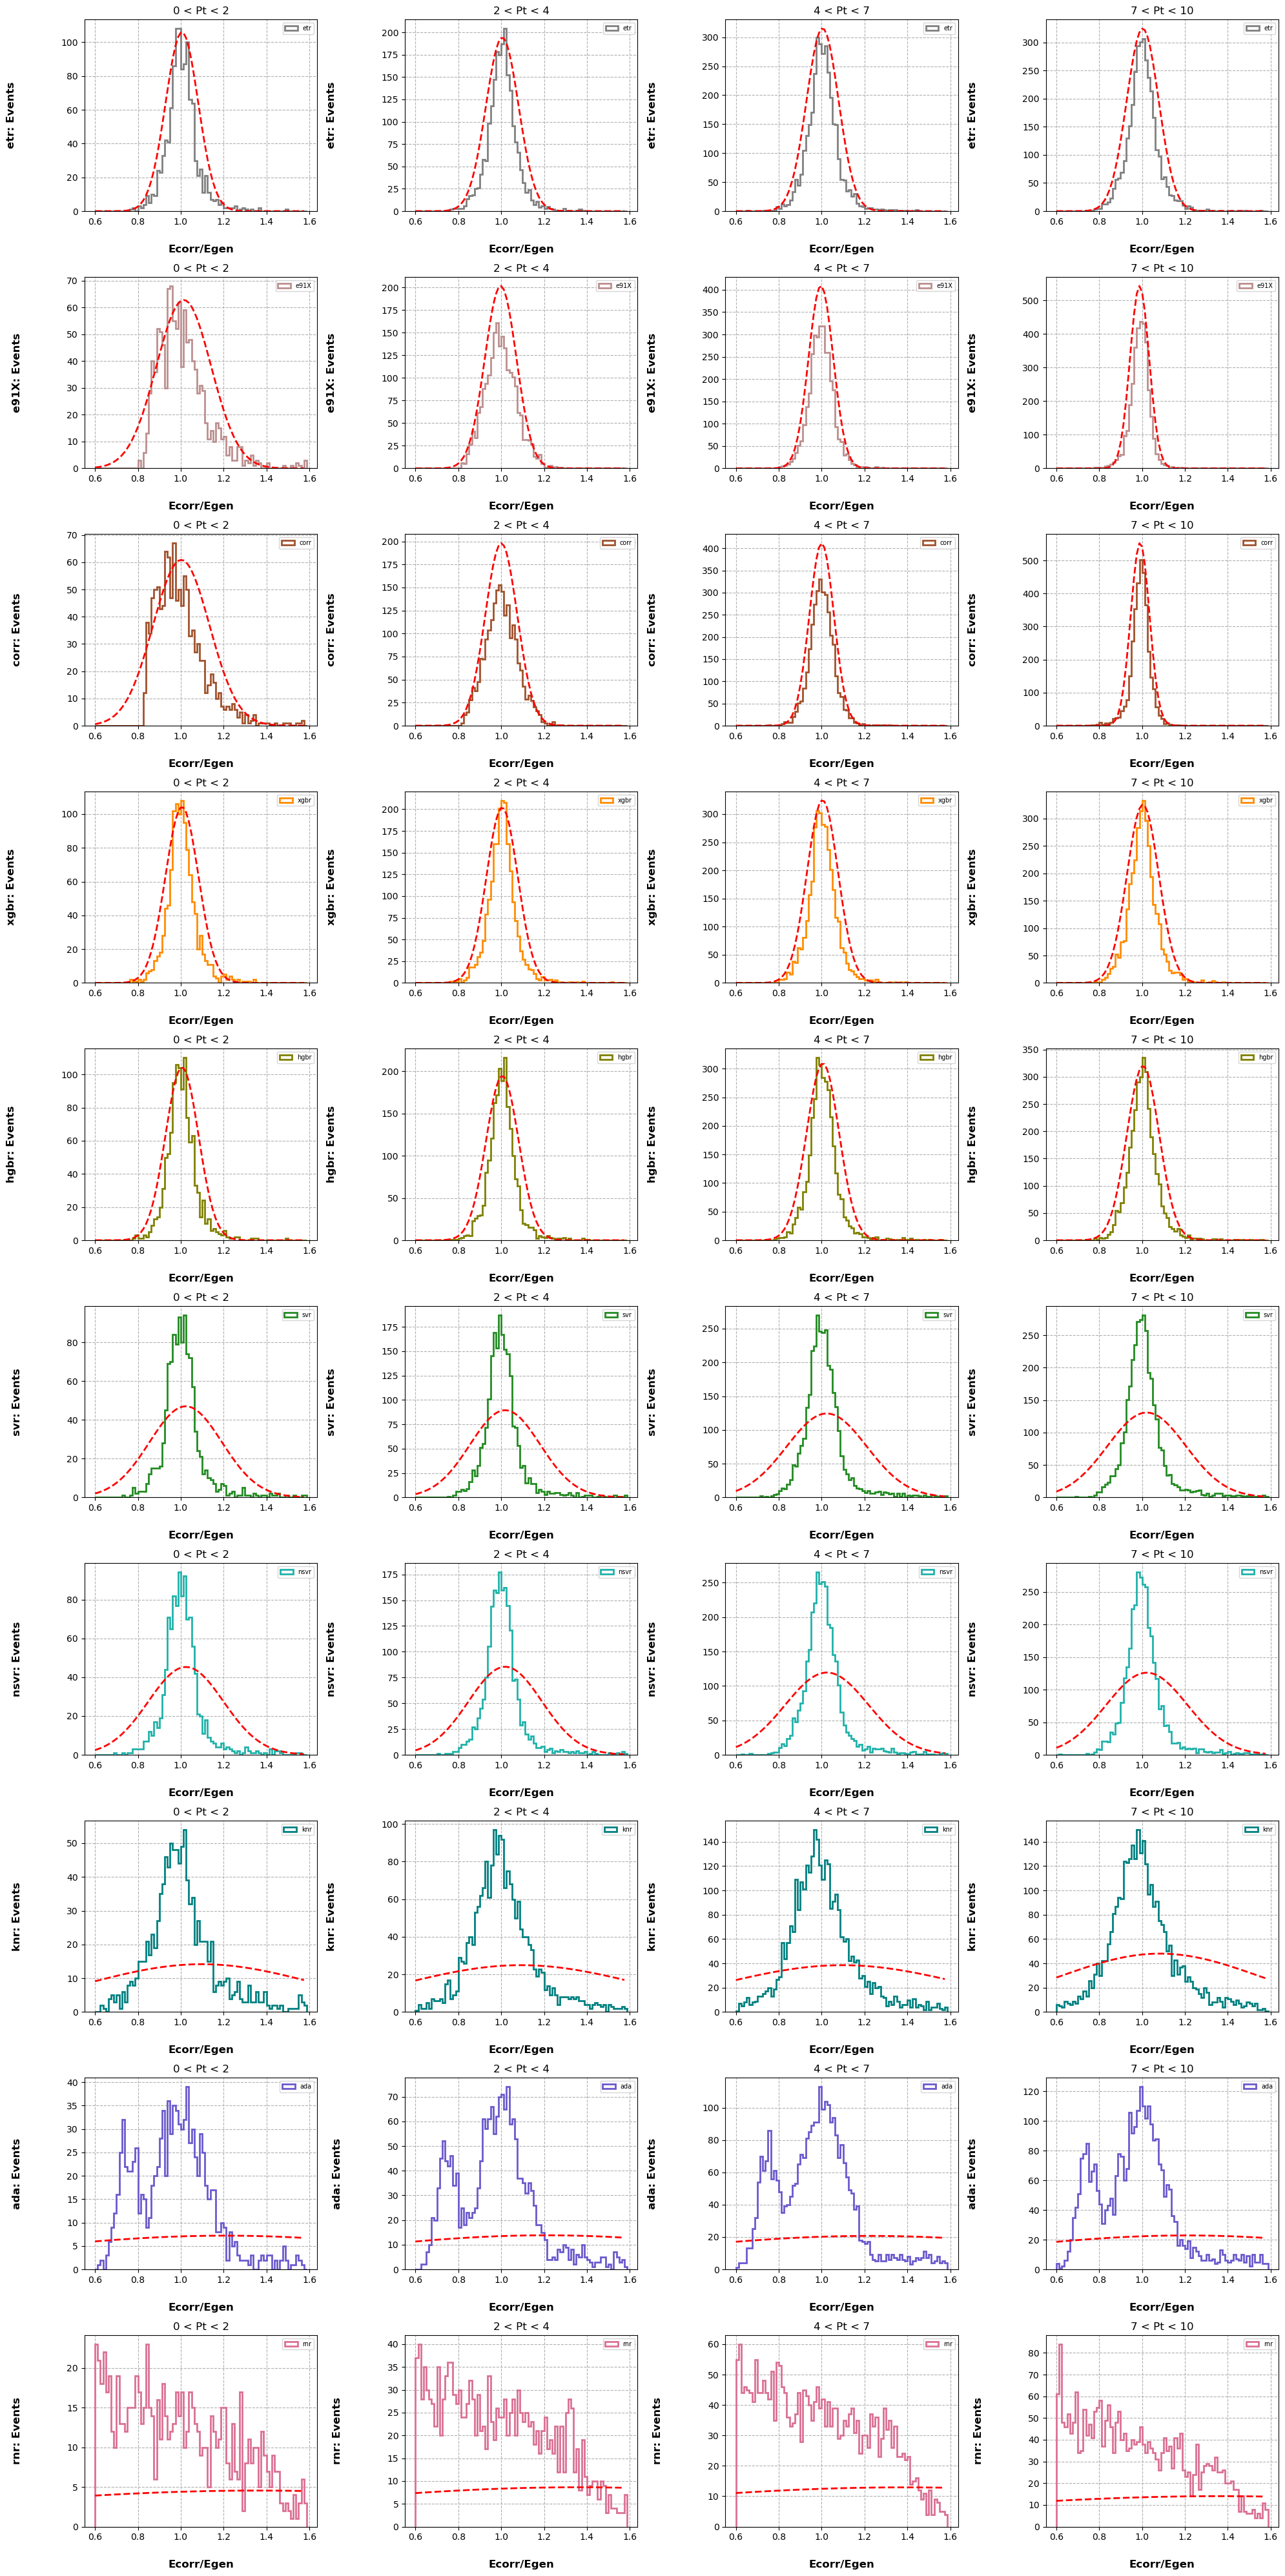

In [69]:
list_of_lists = []

fig, ax4 = plt.subplots(10,4, figsize =(20, 40),sharey=False,tight_layout=True )

for i in range(40):    
    a = i%4
    b = (i - (i%4))/4 
    a = int(a)
    b = int(b)
    
    

    #print(b, " , ", a)
    
    labels = ['etr', 'e91X', 'corr', 'xgbr', 'hgbr', 'svr', 'nsvr', 'knr', 'ada', 'rnr']
    
    
    list_of_lists.append([
        dict_of_genPt_lists_5[a]['etrDivGen'],
        dict_of_genPt_lists_5[a]['e91XDivGen'], 
        dict_of_genPt_lists_5[a]['corrDivGen'],
        dict_of_genPt_lists_5[a]['xgbrDivGen'],
        dict_of_genPt_lists_5[a]['hgbrDivGen'],
        dict_of_genPt_lists_5[a]['svrDivGen'],
        dict_of_genPt_lists_5[a]['nsvrDivGen'],
        dict_of_genPt_lists_5[a]['knrDivGen'],
        dict_of_genPt_lists_5[a]['adaDivGen'],
        dict_of_genPt_lists_5[a]['rfrDivGen']
        ])
    
    
            
    
    #print(list_of_lists[i][b])
    
    
    colors = ['gray', 'rosybrown', 'sienna', 'darkorange', 'olive', 'forestgreen', 'lightseagreen', 'teal', 'slateblue', 'palevioletred']
    
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][b], label = labels[b],color = colors[b], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    
    ax4[b,a].legend(prop={'size':7})
    ax4[b,a].grid('on', ls = '--')
    
    ax4[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax4[b,a].set_ylabel(labels[b] + ": Events", labelpad=50, weight='bold', size=12)
    #if i < 4: 
    ax4[b,a].set_title((str(Ptrange_0_2_4_7_10(a)[0]) + " < Pt < " + str(Ptrange_0_2_4_7_10(a)[1])))
    
    mun, sigma = norm.fit(list_of_lists[i][b])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    ax4[b,a].plot(bins, mean*.7* (1/((sigma*.5) * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r', ls = '--')

    
    
plt.savefig("10x4_model_comp.pdf")

C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\jonla\anaconda4\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


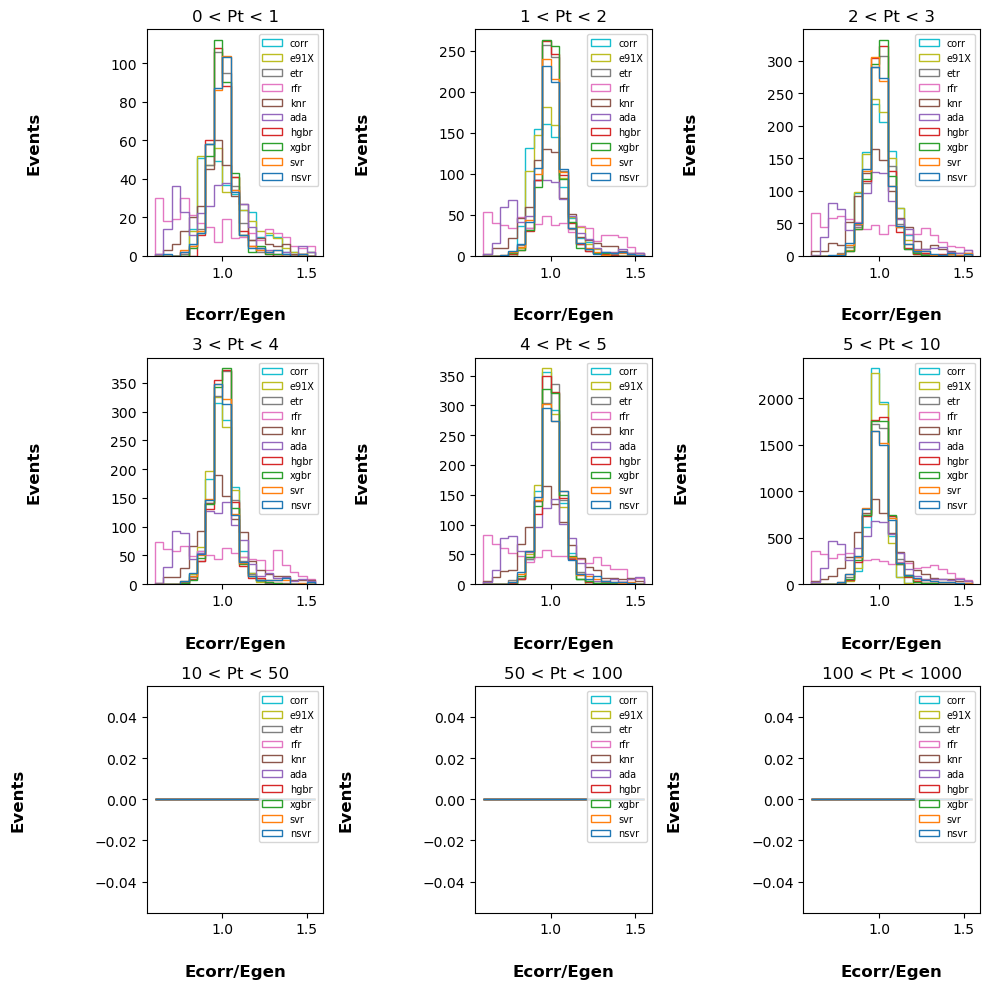

In [70]:

list_of_lists = []

fig, ax = plt.subplots(3,3, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append(
        [dict_of_genPt_lists_1[i]['nsvrDivGen'],
        dict_of_genPt_lists_1[i]['svrDivGen'], 
        dict_of_genPt_lists_1[i]['xgbrDivGen'],
        dict_of_genPt_lists_1[i]['hgbrDivGen'],
        dict_of_genPt_lists_1[i]['adaDivGen'],
        dict_of_genPt_lists_1[i]['knrDivGen'],
        dict_of_genPt_lists_1[i]['rfrDivGen'],
        dict_of_genPt_lists_1[i]['etrDivGen'],
        dict_of_genPt_lists_1[i]['e91XDivGen'],
        dict_of_genPt_lists_1[i]['corrDivGen']
        ])
    
    
   
    labels = ["nsvr","svr", "xgbr","hgbr", "ada", "knr", "rfr", "etr", "e91X", "corr"]
    count, bins, ignored = ax[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax[b,a].legend(prop={'size':7})
    
    
    ax[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(df_lol.iloc[i,2])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]
    
    
plt.savefig("reg_comp_hist.pdf")

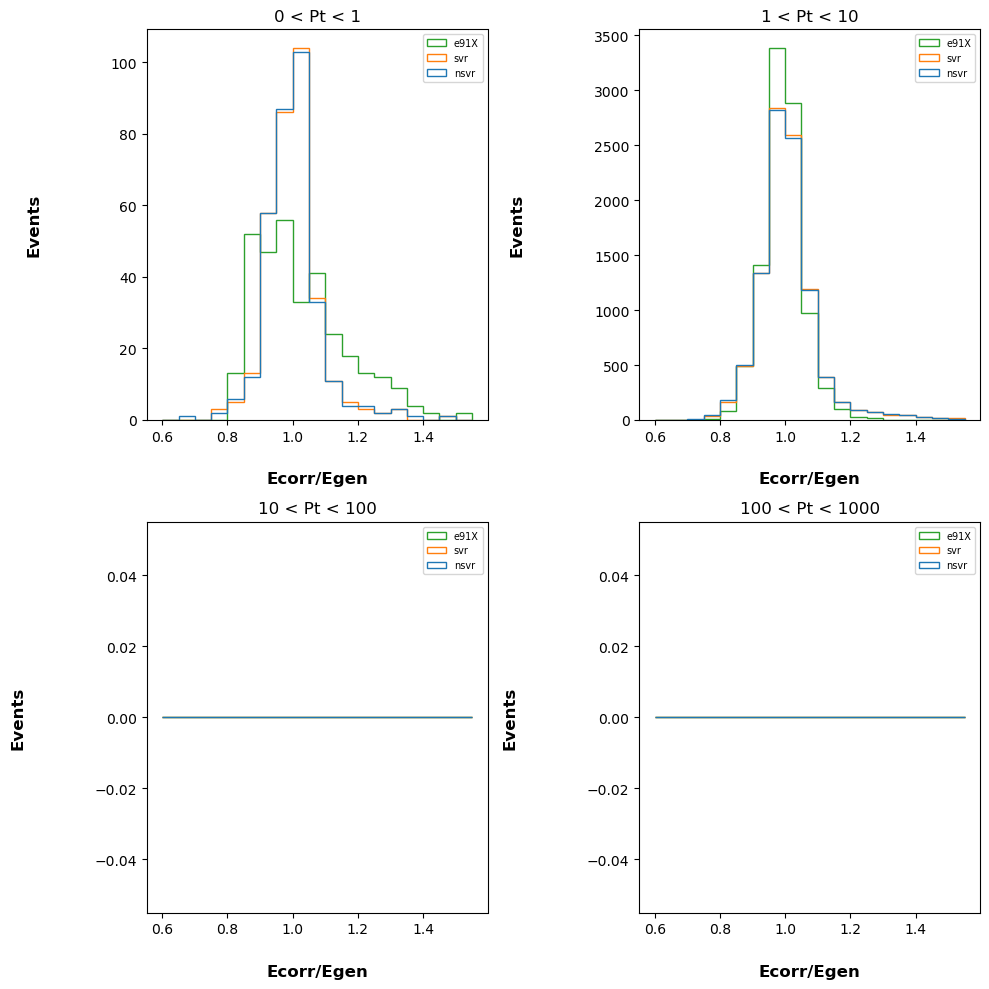

In [71]:
list_of_lists = []

fig, ax1 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        dict_of_genPt_lists_2[i]['nsvrDivGen'],
        dict_of_genPt_lists_2[i]['svrDivGen'], 
        #dict_of_genPt_lists_2[i]['xgbrDivGen'],
        #dict_of_genPt_lists_2[i]['hgbrDivGen'],
        #dict_of_genPt_lists_2[i]['adaDivGen'],
        #dict_of_genPt_lists_2[i]['knrDivGen'],
        #dict_of_genPt_lists_2[i]['rfrDivGen'],
        #dict_of_genPt_lists_2[i]['etrDivGen'],
        dict_of_genPt_lists_2[i]['e91XDivGen'],
        #dict_of_genPt_lists_2[i]['corrDivGen']
        ])
    
    
   
    labels = [
        "nsvr",
        "svr", 
        #"xgbr",
        #"hgbr", 
        #"ada", 
        #"knr", 
        #"rfr", 
        #"etr", 
        "e91X", 
        #"corr"
        ]

    count, bins, ignored = ax1[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax1[b,a].legend(prop={'size':7})
    
    
    ax1[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax1[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax1[b,a].set_title((str(Ptrange_0_1_10_100_1000(i)[0]) + " < Pt < " + str(Ptrange_0_1_10_100_1000(i)[1])))
    
    
    
    bins = bins[:-1]
    
plt.savefig("reg_comp_hist.pdf")

C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\jonla\anaconda4\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


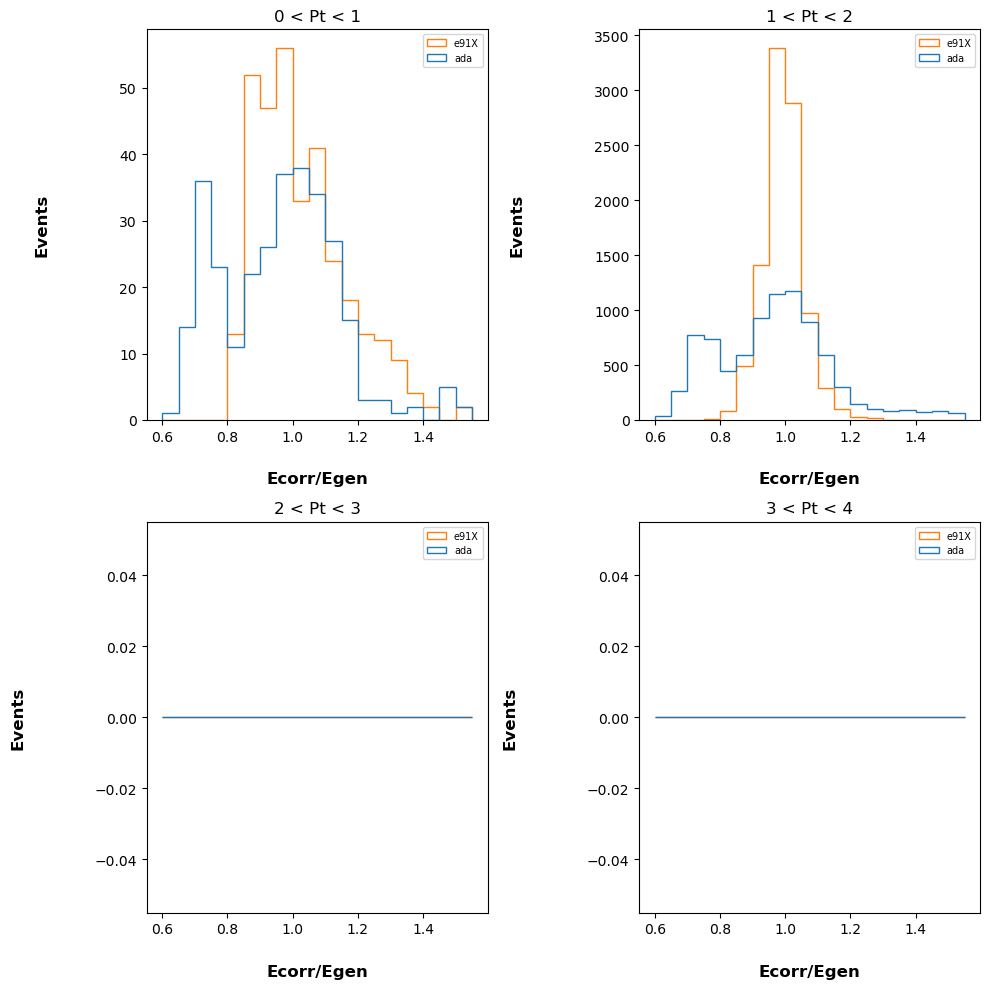

In [72]:
list_of_lists = []

fig, ax2 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        #dict_of_genPt_lists_2[i]['nsvrDivGen'],
        #dict_of_genPt_lists_2[i]['svrDivGen'], 
        #dict_of_genPt_lists_2[i]['xgbrDivGen'],
        #dict_of_genPt_lists_2[i]['hgbrDivGen'],
        dict_of_genPt_lists_2[i]['adaDivGen'],
        #dict_of_genPt_lists_2[i]['knrDivGen'],
        #dict_of_genPt_lists_2[i]['rfrDivGen'],
        #dict_of_genPt_lists_2[i]['etrDivGen'],
        dict_of_genPt_lists_2[i]['e91XDivGen'],
        #dict_of_genPt_lists_2[i]['corrDivGen']
        ])
    
    
   
    labels = [
        #"nsvr",
        #"svr", 
        #"xgbr",
        #"hgbr", 
        "ada", 
        #"knr", 
        #"rfr", 
        #"etr", 
        "e91X", 
        #"corr"
        ]

    count, bins, ignored = ax2[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax2[b,a].legend(prop={'size':7})
    
    
    ax2[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax2[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax2[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(list_of_lists[i][1])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    #ax2[b,a].plot(bins, mean*(sigma**.4)*3* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')

    
    
plt.savefig("reg_comp_hist.pdf")

# Fitting process:

C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\jonla\anaconda4\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


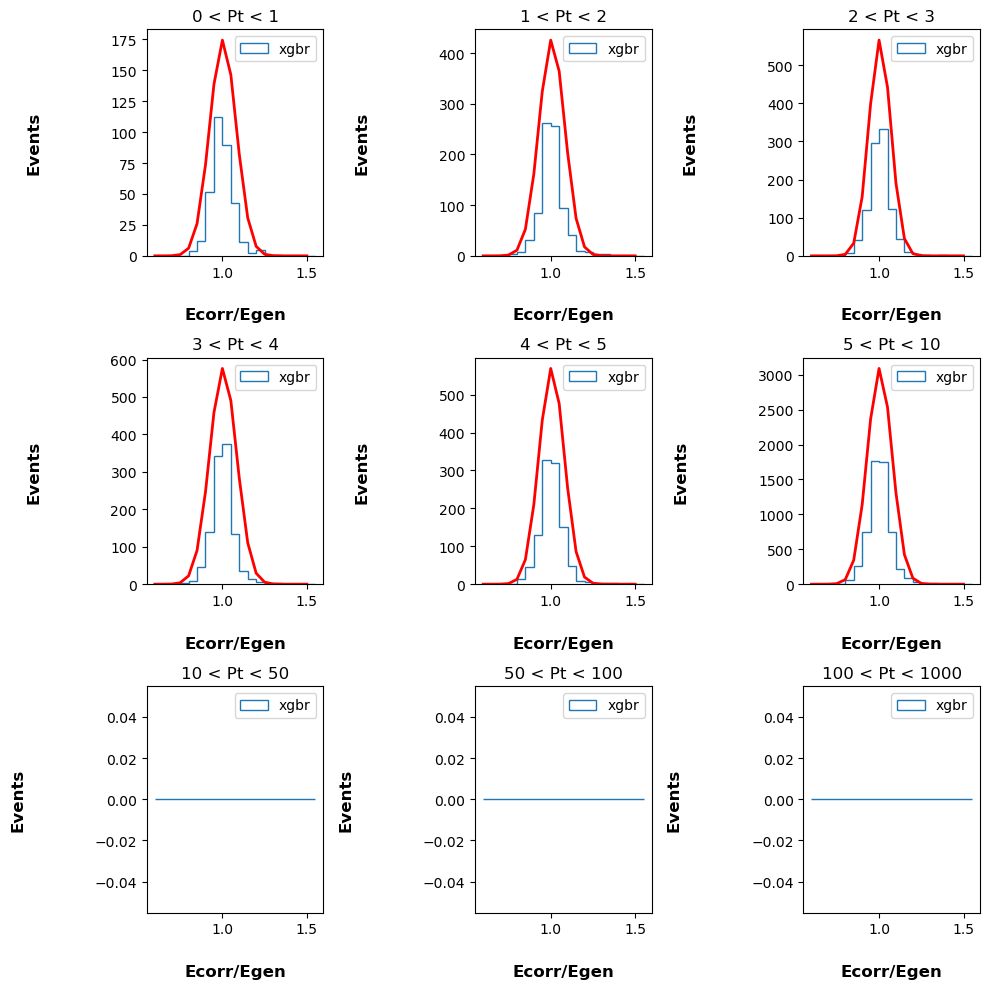

In [73]:

list_of_lists = []

fig, ax3 = plt.subplots(3,3, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        #dict_of_genPt_lists_1[i]['e91XDivGen'],
        #dict_of_genPt_lists_1[i]['nsvrDivGen'],
        #dict_of_genPt_lists_1[i]['svrDivGen'], 
        dict_of_genPt_lists_1[i]['xgbrDivGen'],
        #dict_of_genPt_lists_1[i]['hgbrDivGen'],
        #dict_of_genPt_lists_1[i]['adaDivGen'],
        #dict_of_genPt_lists_1[i]['knrDivGen'],
        #dict_of_genPt_lists_1[i]['rfrDivGen'],
        #dict_of_genPt_lists_1[i]['etrDivGen'],
        #dict_of_genPt_lists_1[i]['corrDivGen']
        ])
    
    
   
    labels = [#"e91X",
              #"nsvr",
              #"svr", 
              "xgbr",
              #"hgbr", 
              #"ada", 
              #"knr", 
              #"rfr", 
              #"etr", 
              #"corr"
             ]
    
    count, bins, ignored = ax3[b,a].hist(list_of_lists[i][0], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax3[b,a].legend(prop={'size':10})
    
    
    ax3[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax3[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax3[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    #df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(list_of_lists[i][0])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    ax3[b,a].plot(bins, mean*(sigma**.5)*7* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')

plt.savefig("reg_comp_hist.pdf")